
# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
!pip install citipy

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [16]:
weather_api_key

'705f6c77237530c83f598014015d4cb0'

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
                  
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | lianyuan
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | ji parana
City not found. Skipping...
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | vorgashor
Processing Record 12 of Set 1 | colipapa
Processing Record 13 of Set 1 | flying fish cove
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | dhidhdhoo
Processing Record 18 of Set 1 | fortaleza
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | kalemie
Processing Record 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.76,76,100,2.13,GS,1704177046
1,port-aux-francais,-49.3500,70.2167,4.80,76,56,16.77,TF,1704177046
2,lianyuan,27.6883,111.6642,9.02,84,100,1.94,CN,1704177048
3,whitehorse,60.7161,-135.0538,-13.57,92,100,2.06,CA,1704177048
4,hawaiian paradise park,19.5933,-154.9731,22.15,90,75,2.57,US,1704177049


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.76,76,100,2.13,GS,1704177046
1,port-aux-francais,-49.3500,70.2167,4.80,76,56,16.77,TF,1704177046
2,lianyuan,27.6883,111.6642,9.02,84,100,1.94,CN,1704177048
3,whitehorse,60.7161,-135.0538,-13.57,92,100,2.06,CA,1704177048
4,hawaiian paradise park,19.5933,-154.9731,22.15,90,75,2.57,US,1704177049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

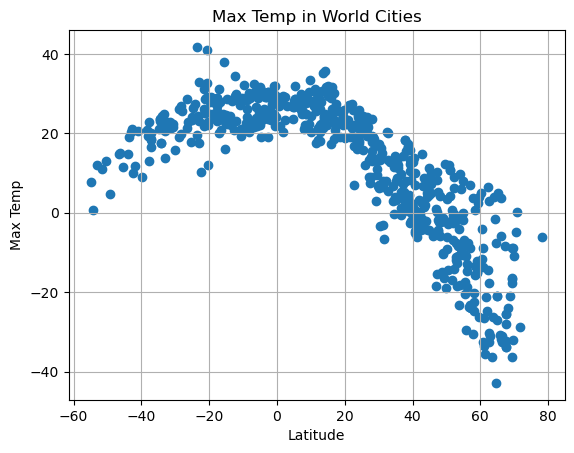

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Max Temp in World Cities")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

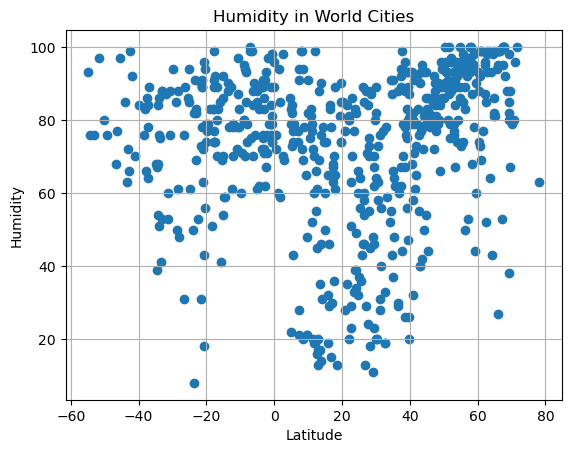

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

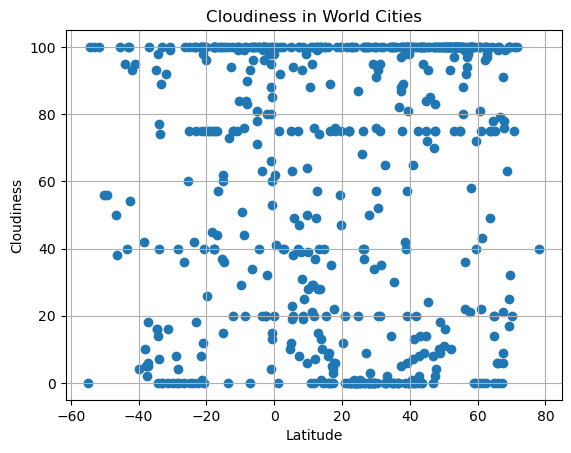

In [31]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

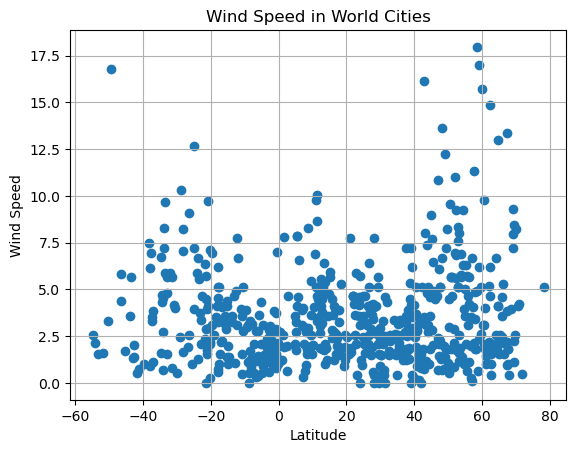

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")
# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots

def my_function(x_values, y_values, x_label, y_label, text):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,text,fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()


In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lianyuan,27.6883,111.6642,9.02,84,100,1.94,CN,1704177048
3,whitehorse,60.7161,-135.0538,-13.57,92,100,2.06,CA,1704177048
4,hawaiian paradise park,19.5933,-154.9731,22.15,90,75,2.57,US,1704177049
7,tiksi,71.6872,128.8694,-28.69,100,100,0.48,RU,1704177052
8,vorgashor,67.5833,63.9500,-33.74,100,21,0.99,RU,1704177053


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude< 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.76,76,100,2.13,GS,1704177046
1,port-aux-francais,-49.3500,70.2167,4.80,76,56,16.77,TF,1704177046
5,waitangi,-43.9535,-176.5597,14.90,85,95,3.58,NZ,1704177050
6,fale old settlement,-9.3852,-171.2468,28.98,71,51,2.98,TK,1704177050
10,flying fish cove,-10.4217,105.6791,28.82,78,100,5.14,CX,1704177054


###  Temperature vs. Latitude Linear Regression Plot

y = -0.81x +36.21
The r-value is: 0.7775330276172071


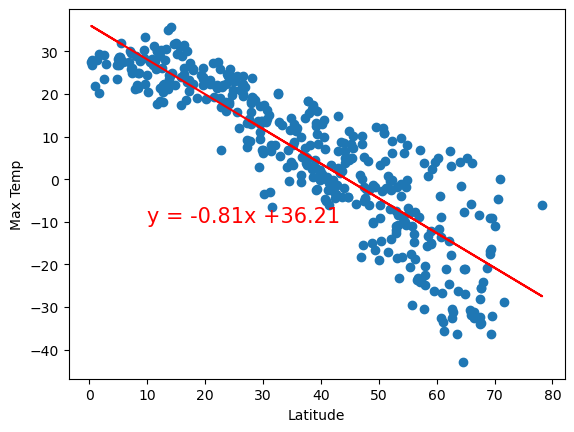

In [56]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()





y = -0.81x +36.21
The r-value is: 0.7775330276172071


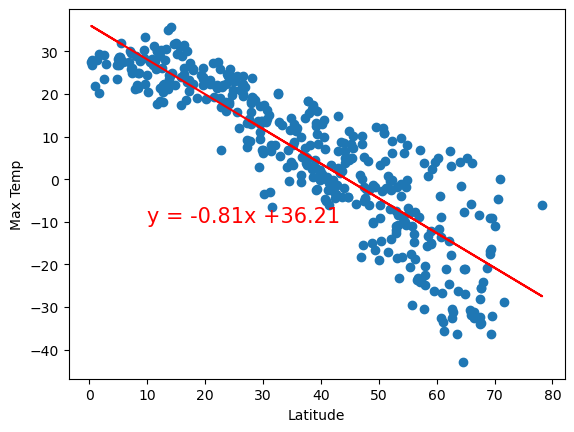

In [57]:
# Linear regression on Northern Hemisphere using the function
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
my_function(x_values, y_values,'Latitude', 'Max Temp', (10,-10))

y = 0.27x +29.14
The r-value is: 0.39295192800029616


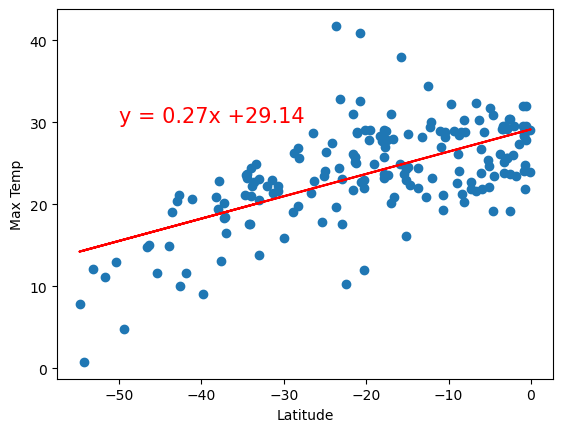

In [65]:
# Linear regression on Northern Hemisphere using the function
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
my_function(x_values, y_values,'Latitude', 'Max Temp', (-50,30))

**Discussion about the linear relationship:** The Max Tempature vs. Latitude plot for cities in the northern hemisphere is shown above. The r-value(=rvalue**2) is 0.77 , the max temperature appears show a strong negative linear relationship with latitudes in the northern hemisphere.
The Max Tempature vs. Latitude plot for cities in the southern hemisphere is also shown above. The r-value is 0.39 ,Unlike northern hemisphere, the data seems to show week relationship between max tempature and latitude for the southern hemisphere.

Humidity vs. Latitude Linear Regression Plot

y = 0.53x +51.75
The r-value is: 0.1830852418795345


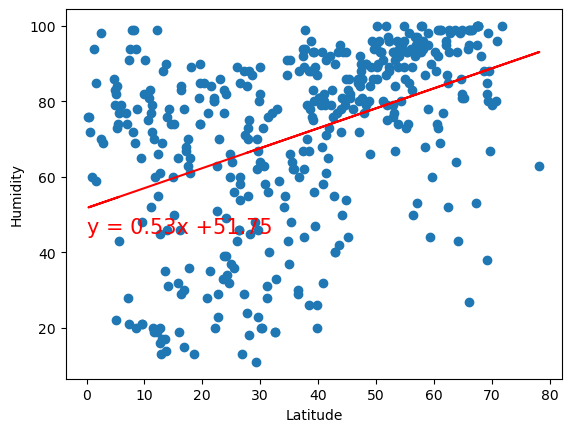

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
my_function(x_values, y_values,'Latitude', 'Humidity', (0,45))

y = 0.16x +80.05
The r-value is: 0.021952796255216844


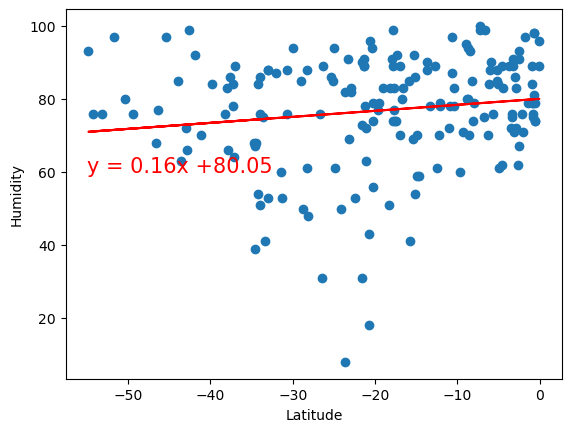

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
my_function(x_values, y_values,'Latitude', 'Humidity', (-55,60))

**Discussion about the linear relationship:** The Humidity vs. Latitude plot for cities in the northern hemisphere is shown above. The r-value is 0.18 , the data seems to show no relationship between Humidity and latitude for the northern hemisphere.
The Humidity vs. Latitude plot for cities in the southern hemisphere is also shown above. Ther-value is 0.02 , the data seems to show no relationship between Humidity and latitude for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.5x +40.33
The r-value is: 0.0536096065274961


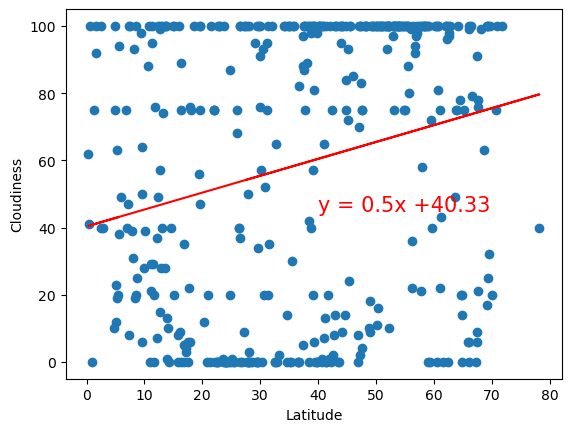

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
my_function(x_values, y_values,'Latitude', 'Cloudiness', (40,45))

y = 0.63x +76.27
The r-value is: 0.05584759760723409


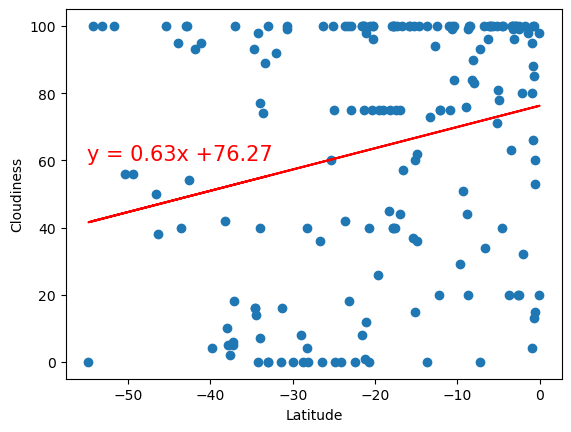

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
my_function(x_values, y_values,'Latitude', 'Cloudiness', (-55,60))

**Discussion about the linear relationship:** The Cloudiness vs. Latitude plot for cities in the northern hemisphere is shown above. The r-value is 0.05 , the data seems to show no relationship between cloudiness and latitude for the northern hemisphere.
The Cloudiness vs. Latitude plot for cities in the southern hemisphere is also shown above. The r-value is 0.05 , the data seems to show no relationship between cloudiness and latitude for the southern hemisphere.


### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x +2.82
The r-value is: 0.02039101281139657


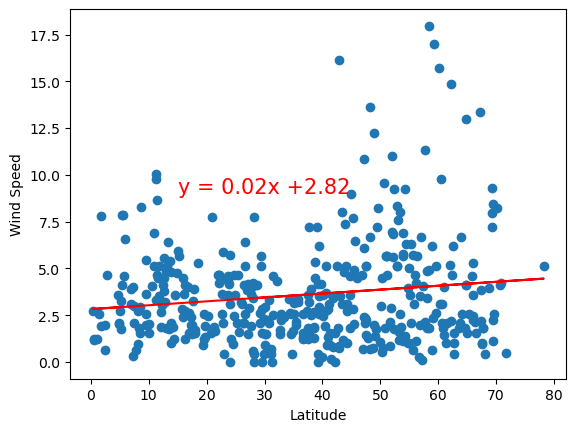

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
my_function(x_values, y_values,'Latitude', 'Wind Speed', (15,9))

y = -0.05x +2.23
The r-value is: 0.09312054375106586


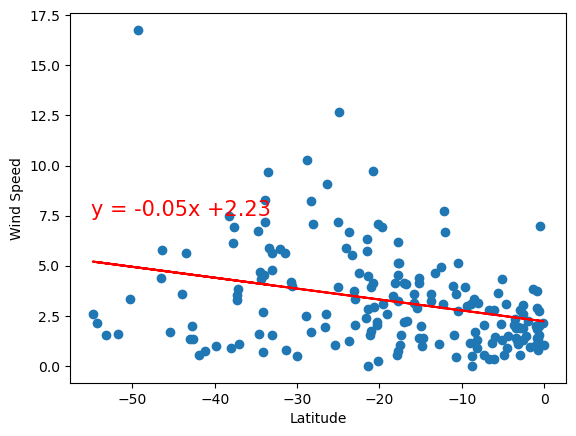

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
my_function(x_values, y_values,'Latitude', 'Wind Speed', (-55,7.5))

**Discussion about the linear relationship:** The Wind Speed vs. Latitude plot for cities in the northern hemisphere is shown above. the r-value is 0.02 , the data seems to show no relationship between wind speed and latitude for the northern hemisphere.
The Wind Speed vs. Latitude plot for cities in the southern hemisphere is als shown above. the  r-value is 0.09 , the data seems to show no relationship between wind speed and latitude for the southern hemisphere.
